In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

data = pd.read_csv('main dataset.csv')

In [3]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module='pandas')


In [5]:
features = data[['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Late_delivery_risk', 'Order Item Product Price', 'Order Item Quantity']]
target = data['Delivery Status']

In [7]:
from sklearn.impute import SimpleImputer
import numpy as np
'''print("Target data type:", target.dtype)
print("Unique values in target:", target.unique())
print("NaNs in features:\n", features.isna().sum())
print("Infinite values in features:\n", np.isinf(features).sum())
print("NaNs in target:\n", target.isna().sum())'''




'print("Target data type:", target.dtype)\nprint("Unique values in target:", target.unique())\nprint("NaNs in features:\n", features.isna().sum())\nprint("Infinite values in features:\n", np.isinf(features).sum())\nprint("NaNs in target:\n", target.isna().sum())'

In [9]:
features.replace([np.inf, -np.inf], np.nan, inplace=True)
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=42, stratify=target)
'''print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of features after imputation:", features_imputed.shape)
print("Sample rows of features:\n", features_imputed[:5])
print("Sample rows of target:\n", target[:5])'''


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17544\1236086233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.replace([np.inf, -np.inf], np.nan, inplace=True)


'print("Shape of X_train:", X_train.shape)\nprint("Shape of y_train:", y_train.shape)\nprint("Shape of features after imputation:", features_imputed.shape)\nprint("Sample rows of features:\n", features_imputed[:5])\nprint("Sample rows of target:\n", target[:5])'

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=42, stratify=target)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (144415, 7)
Shape of y_train: (144415,)


In [13]:
model = RandomForestClassifier()
try:
    model.fit(X_train, y_train)
except ValueError as e:
    print(f"Error during model fitting: {e}")

# Predict and evaluate
try:
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
except ValueError as e:
    print(f"Error during prediction: {e}")


Accuracy: 0.9778971859073787
Classification Report:
                    precision    recall  f1-score   support

 Advance shipping       0.96      0.99      0.97      8318
    Late delivery       1.00      1.00      1.00     19796
Shipping canceled       0.85      0.58      0.69      1551
 Shipping on time       0.96      0.99      0.97      6439

         accuracy                           0.98     36104
        macro avg       0.94      0.89      0.91     36104
     weighted avg       0.98      0.98      0.98     36104



In [15]:
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test data
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy on the training and test data
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.9934
Test Accuracy: 0.9779


In [16]:
import joblib
joblib.dump(model, 'randomforest.pkl')

['randomforest.pkl']

In [19]:
import os

notebook_dir = os.getcwd()
print("Current notebook directory:", notebook_dir)

notebook_name = "delivery status.ipynb"  # Replace with your actual notebook name

# Combine to get the full path
full_notebook_path = os.path.join(notebook_dir, notebook_name)
print("Full notebook path:", full_notebook_path)

Current notebook directory: C:\Users\LENOVO\Ml project digital twin
Full notebook path: C:\Users\LENOVO\Ml project digital twin\delivery status.ipynb


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

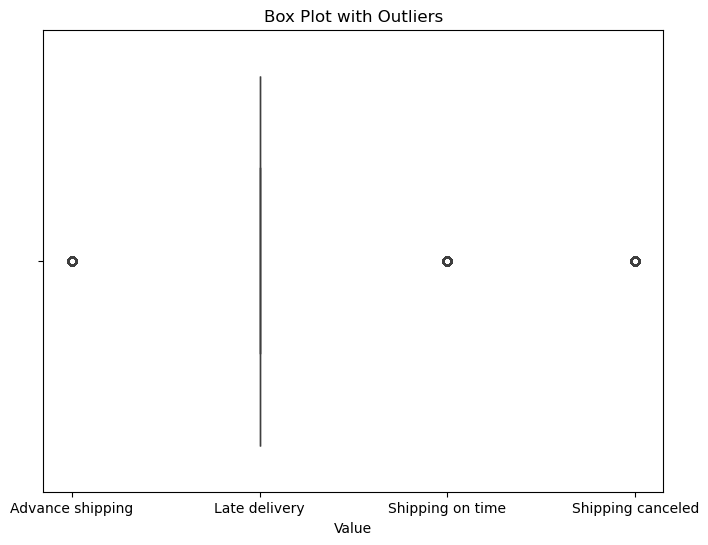

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Delivery Status'])

plt.title('Box Plot with Outliers')
plt.xlabel('Value')

plt.show()

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

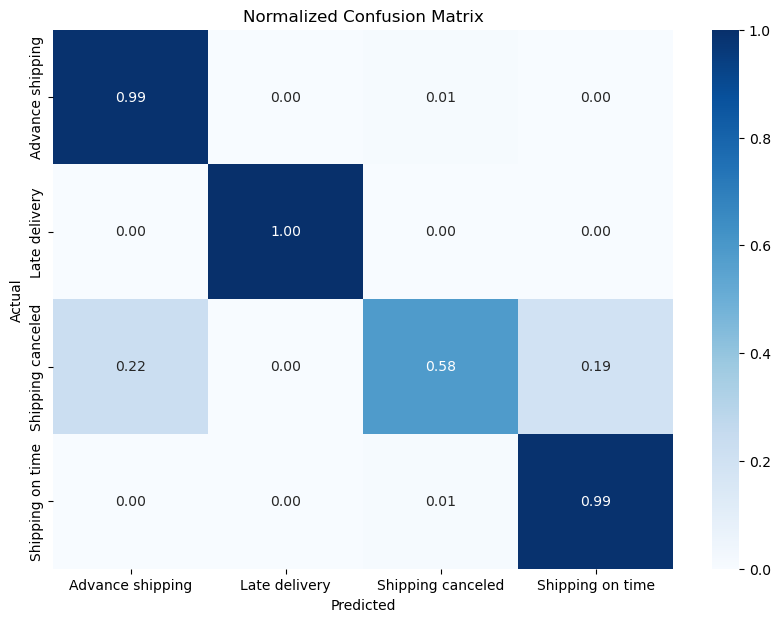

In [27]:
cm = confusion_matrix(y_test, y_pred)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

In [29]:

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve, auc
import numpy as np

In [37]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]
y_prob = model.predict_proba(X_test)

In [39]:
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

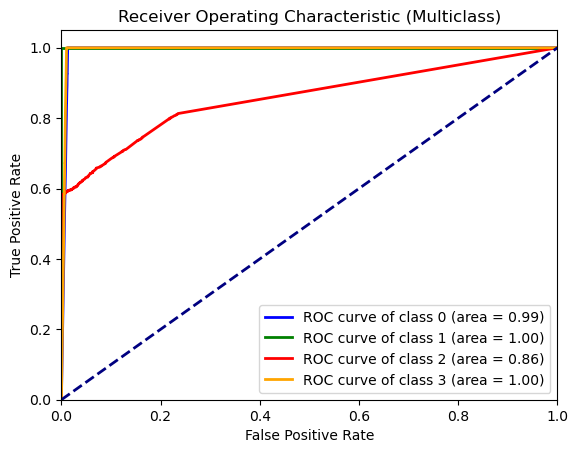

In [41]:
plt.figure()
colors = ['blue', 'green', 'red', 'orange'] 
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (Multiclass)')

plt.legend(loc='lower right')

plt.show()

In [68]:

roc_auc_micro = roc_auc_score(y_test_bin, y_prob, average='micro')

roc_auc_macro = roc_auc_score(y_test_bin, y_prob, average='macro')

print(f"Micro-average ROC AUC: {roc_auc_micro:.2f}")
print(f"Macro-average ROC AUC: {roc_auc_macro:.2f}")

Micro-average ROC AUC: 0.99
Macro-average ROC AUC: 0.96


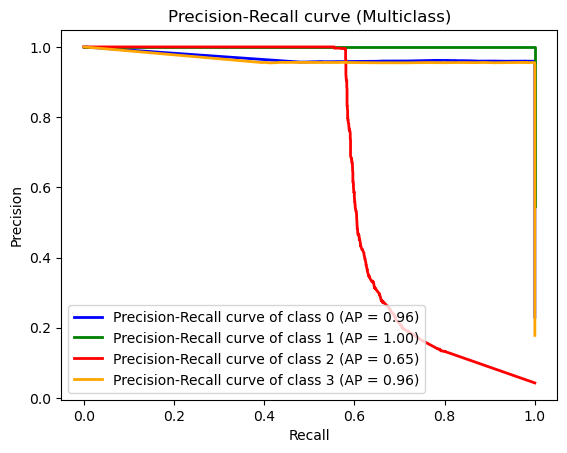

In [70]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision = {}
recall = {}
average_precision = {}
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_prob[:, i])

plt.figure()
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2, label=f'Precision-Recall curve of class {i} (AP = {average_precision[i]:0.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve (Multiclass)')
plt.legend(loc='best')
plt.show()